## Exercise of Plane Curves in SageMath - Differential Geometry
#### Raul Almuzara

---------------------------

### *Questions:*

Consider the subset $C$ of $\mathbb{R}^2$ given by $f(x,y)=0$ where 
$$
f(x,y)=27 \, x^{3} + 108 \, x^{2} y + 144 \, x y^{2} + 64 \, y^{3} - 1620 \, x^{2} + 4680 \, x y - 255 \, y^{2} + 6975 \, x - 1950 \, y - 15625.
$$

1. Find the unique point $P\in C$ where both partial derivatives of $f$ vanish.
2. Using the lines that pass through $P$, give a parametrization of $C$.
3. Make a substitution to avoid definition problems and obtain a regular parametrization $\mathbf{x}:\mathbb{R}\to\mathbb{R}^2$ whose trace is in $C$.
4. Is there any point of $C$ missing in the trace of the parametrization?
5. Compute the curvature and find the vertices. Pick the one in the middle which we will call $Q$.
6. Reparametrize the curve such that $\mathbf{x}(0)=Q$ and $||\mathbf{x}'(0)||=1$.
7. Compute again the curvature $\kappa$, compare $\kappa(t)$ and $\kappa(-t)$ and discuss the comparison geometrically.
8. Compute the evolute and plot it along with the curve.

-------------------------

### *Solution:*

We define the variables of the exercise and the function $f$.

In [1]:
var('x,y,t,a,b', domain='real')
f = 27*x^3 + 108*x^2*y + 144*x*y^2 + 64*y^3 - 1620*x^2 + 4680*x*y - 255*y^2 + 6975*x - 1950*y - 15625

----------------------------

#### Question 1: Find the unique point $P\in C$ where both partial derivatives of $f$ vanish.

We apply the function `derivative` on $f$ to obtain the partial derivative with respect to $x$ which will be called `partialfx` and the partial derivative with respect to $y$ which will be called `partialfy`. Then, we solve the system formed by $f$ and its two partial derivatives equal to zero with the function `solve`.

In [2]:
partialfx = f.derivative(x)
partialfy = f.derivative(y)
solve([f,partialfx,partialfy],[x,y])

[[x == (-17/5), y == (-31/5)]]

Obtaining the unique point $P=\left(-\frac{17}{5},-\frac{31}{5}\right)$

----------------------------

#### Question 2: Using the lines that pass through $P$, give a parametrization of $C$.

The lines passing through $P$ (except the vertical line) are of the form

$$y=-\frac{31}{5}+t\left(x+\frac{17}{5}\right),\hspace{5mm} t\in\mathbb{R}$$

We evaluate $f$ at these lines

In [3]:
y0 = -31/5 + t*(x+17/5)
g = f(y=y0).factor()
show(g)

1/125*(320*t^3*x + 1088*t^3 + 720*t^2*x - 7227*t^2 + 540*t*x + 12636*t + 135*x - 12366)*(5*x + 17)^2

With `solve`, the expression above is set equal to zero and we solve for $x$ as a function of $t$.

In [4]:
xa = solve(g,x)[0].rhs().factor()
show(xa)

-1/5*(1088*t^3 - 7227*t^2 + 12636*t - 12366)/(4*t + 3)^3

We evaluate the expression above at the lines to obtain an expression of $y$ as a function of $t$.

In [5]:
ya = y0(x=xa).factor()
show(ya)

1/5*(7691*t^3 - 15264*t^2 + 9477*t - 837)/(4*t + 3)^3

Thus, a parametrization $(x(t),y(t))$ of $C$ is

In [6]:
V = vector([xa,ya]).apply_map(factor)
show(V)

(-1/5*(1088*t^3 - 7227*t^2 + 12636*t - 12366)/(4*t + 3)^3, 1/5*(7691*t^3 - 15264*t^2 + 9477*t - 837)/(4*t + 3)^3)

----------------------------

#### Question 3: Make a substitution to avoid definition problems and obtain a regular parametrization $\mathbf{x}:\mathbb{R}\to\mathbb{R}^2$ whose trace is in $C$.

We see that the parametrization above has denominators which can vanish and may be problematic. In particular, the parametrization is not defined at $t=-\frac{3}{4}$. First, we will apply the transformation $t\rightarrow t-\frac{3}{4}$ and the singularity will now be located at $t=0$.

In [7]:
V1=V(t=t-3/4).apply_map(factor)
show(V1)

(-1/5120*(17408*t^3 - 154800*t^2 + 405000*t - 421875)/t^3, 1/20480*(492224*t^3 - 2084400*t^2 + 2902500*t - 1265625)/t^3)

Then, we apply the transformation $t\rightarrow \frac{1}{t}$ to remove the singularity.

In [8]:
V2=V1(t=1/t).apply_map(factor)
show(V2)

(84375/1024*t^3 - 10125/128*t^2 + 1935/64*t - 17/5, -253125/4096*t^3 + 145125/1024*t^2 - 26055/256*t + 7691/320)

Graphically:

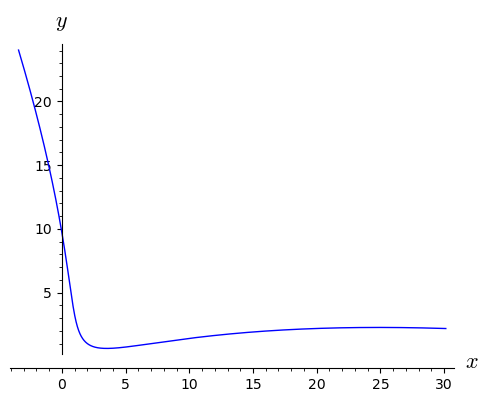

In [9]:
parametric_plot(V2,(t,0,1),axes_labels=['$x$','$y$'])

-----------------------------

#### Question 4: Is there any point of $C$ missing in the trace of the parametrization?

The point $P=\left(-\frac{17}{5},-\frac{31}{5}\right)$ does not seem to be in the trace of the parametrization despite the fact that $P\in C$. We can see that the trace of the parametrization defines a function that maps each value of $x$ to a unique value of $y$. As $f(x,y)$ is a degree 3 polynomial in $y$, there are, at most, 3 possible ways to solve $y$ as a function of $x$.

In [10]:
show(solve([f],[y])[0])
show(solve([f],[y])[1])
show(solve([f],[y])[2])

y == -1/8192*((48*x - 85)^2 - 2304*x^2 - 99840*x + 41600)*(-I*sqrt(3) + 1)/(-1/262144*(48*x - 85)^3 - 27/128*x^3 + 3/4096*(18*x^2 + 780*x - 325)*(48*x - 85) + 405/32*x^2 + 3375/4096*sqrt(100*x^2 - 175*x + 98)*(5*x + 17) - 6975/128*x + 15625/128)^(1/3) - 1/2*(-1/262144*(48*x - 85)^3 - 27/128*x^3 + 3/4096*(18*x^2 + 780*x - 325)*(48*x - 85) + 405/32*x^2 + 3375/4096*sqrt(100*x^2 - 175*x + 98)*(5*x + 17) - 6975/128*x + 15625/128)^(1/3)*(I*sqrt(3) + 1) - 3/4*x + 85/64

y == -1/8192*((48*x - 85)^2 - 2304*x^2 - 99840*x + 41600)*(I*sqrt(3) + 1)/(-1/262144*(48*x - 85)^3 - 27/128*x^3 + 3/4096*(18*x^2 + 780*x - 325)*(48*x - 85) + 405/32*x^2 + 3375/4096*sqrt(100*x^2 - 175*x + 98)*(5*x + 17) - 6975/128*x + 15625/128)^(1/3) - 1/2*(-1/262144*(48*x - 85)^3 - 27/128*x^3 + 3/4096*(18*x^2 + 780*x - 325)*(48*x - 85) + 405/32*x^2 + 3375/4096*sqrt(100*x^2 - 175*x + 98)*(5*x + 17) - 6975/128*x + 15625/128)^(1/3)*(-I*sqrt(3) + 1) - 3/4*x + 85/64

y == -3/4*x + 1/4096*((48*x - 85)^2 - 2304*x^2 - 99840*x + 41600)/(-1/262144*(48*x - 85)^3 - 27/128*x^3 + 3/4096*(18*x^2 + 780*x - 325)*(48*x - 85) + 405/32*x^2 + 3375/4096*sqrt(100*x^2 - 175*x + 98)*(5*x + 17) - 6975/128*x + 15625/128)^(1/3) + (-1/262144*(48*x - 85)^3 - 27/128*x^3 + 3/4096*(18*x^2 + 780*x - 325)*(48*x - 85) + 405/32*x^2 + 3375/4096*sqrt(100*x^2 - 175*x + 98)*(5*x + 17) - 6975/128*x + 15625/128)^(1/3) + 85/64

Only the third one is valid because it is the only one that is purely real. This defines a function $y=y(x)$ whose graph is the same as the trace of the parametrization.

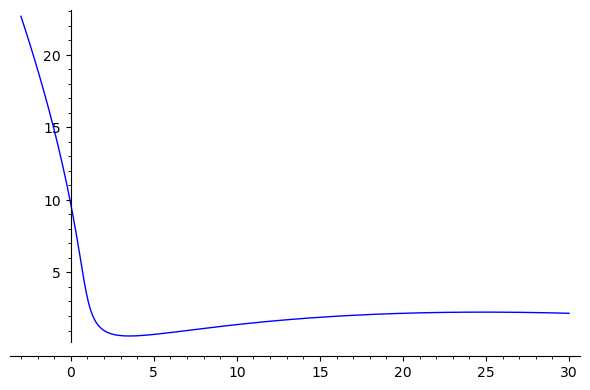

In [11]:
plot(solve([f],[y])[2].rhs(),-3,30)

In [12]:
show(solve([f],[y])[2](x=-17/5))

y == (7691/320)

In particular, $y\left(-\frac{17}{5}\right)=\frac{7691}{320}\neq -\frac{31}{5}$, so the point $\left(-\frac{17}{5},\frac{7691}{320}\right)\in C$ is in the trace of the parametrization to ensure its continuity (because it is differentiable). Nevertheless, $\left(-\frac{17}{5},-\frac{31}{5}\right)\in C$ is not in the trace because $x=-\frac{17}{5}$ can only be mapped to a single value of $y$.

This may happen when we try to parametrize a curve with lines, as we did. We may have the case where the common point ($P$) of the pencil of lines does not belong to the trace of the parametrization.

--------------------------

#### Question 5: Compute the curvature and find the vertices. Pick the one in the middle which we will call $Q$.

The formula for the curvature es

$$\kappa(t)=\frac{\text{det}(\mathbf{x}',\mathbf{x}'')}{||\mathbf{x}'(t)||^3}=\frac{x'y''-x''y'}{||\mathbf{x}'(t)||^3}$$

If `V2` is the variable that contains the parametrization, we obtain its first derivative `V2prime`, the norm of the first derivative `V2primenorm` and the second derivative `V2primeprime`. After that, we apply the formula above.

In [13]:
V2prime = V2.derivative(t)
V2primenorm = V2prime.norm()
V2primeprime = V2prime.derivative(t)
k = (V2prime[0]*V2primeprime[1] - V2primeprime[0]*V2prime[1]) / (V2primenorm^3)

In [14]:
show(k)

-163840/3*((5625*t^2 - 3600*t + 688)*(225*t - 172) - 9*(5625*t^2 - 8600*t + 3088)*(25*t - 8))/(16*(5625*t^2 - 3600*t + 688)^2 + 9*(5625*t^2 - 8600*t + 3088)^2)^(3/2)

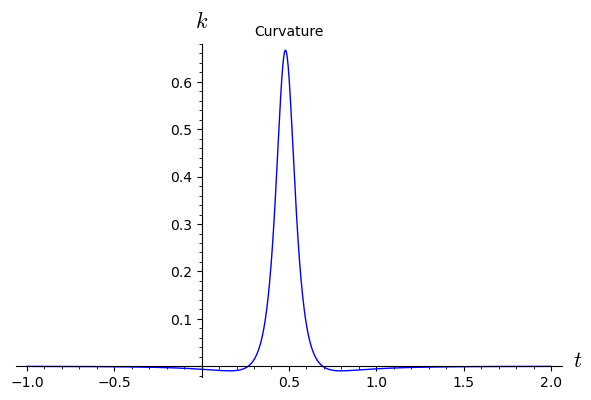

In [15]:
plot(k,-1,2,axes_labels=['$t$','$k$'],title='Curvature')

The vertices are the points of the curve with parameter $t$ such that $\kappa'(t)=0$. We compute them with the function `solve`.

In [16]:
show(solve([k.derivative(t)],[t]))

[t == -16/75*5^(1/4) + 12/25, t == 16/75*5^(1/4) + 12/25, t == (12/25)]

We see that $\kappa'(t)=0$ in the following three points:

In [17]:
show(N(V2(t=-16/75*5^(1/4) + 12/25)))
show(N(V2(t=12/25)))
show(N(V2(t=16/75*5^(1/4) + 12/25)))

(-0.238875935336996, 11.0644118671270)

(2.00000000000000, 1.00000000000000)

(12.2887206543362, 1.66871442487204)

Among those three, the point in the middle is the one obtained with parameter $t=\frac{12}{25}$ according to the previous parametrization. This gives the point $Q=(2,1)$ where the derivative of the curvature vanishes regardless of the chosen parametrization.

-------------------------------

#### Question 6: Reparametrize the curve such that $\mathbf{x}(0)=Q$ and $||\mathbf{x}'(0)||=1$.

In order to change the initial point and the initial speed, we use a transformation of the form $t\rightarrow at+b$. We apply this transformation and we evaluate the curve at $t=0$.

In [18]:
show(V2(t=a*t+b)(t=0))

(84375/1024*b^3 - 10125/128*b^2 + 1935/64*b - 17/5, -253125/4096*b^3 + 145125/1024*b^2 - 26055/256*b + 7691/320)

We just got an expression that allows us to obtain $b$ if we consider that the initial point is $Q=(2,1)$, setting both components equal to $2$ and $1$, respectively. We use the function `solve`.

In [19]:
show(solve([V2(t=a*t+b)(t=0)[0]==2,V2(t=a*t+b)(t=0)[1]==1],[b]))

[[b == (12/25)]]

Therefore, transformations of the form $t\rightarrow at+\frac{12}{25}$ ensure that $\mathbf{x}(0)=(2,1)$. With the reparametrization, we compute $||\mathbf{x}'(0)||$. 

In [20]:
show(V2(t=a*t+12/25).derivative(t)(t=0).norm())

225/16*abs(a)

Setting speed equal to $1$ at the initial point, we solve for $a$.

In [21]:
show(solve([V2(t=a*t+12/25).derivative(t)(t=0).norm()==1],[a]))

[abs(a) == (16/225)]

Thus, we take $a=\frac{16}{225}$ along with $b=\frac{12}{25}$ and we get the transformation $t\rightarrow \frac{16}{225}t+\frac{12}{25}$. This defines a reparametrization such that $\mathbf{x}(0)=Q=(2,1)$ and $||\mathbf{x}'(0)||=1$.

In [22]:
show(V2(t=(16/225)*t+(12/25))(t=0)) #Initial point
show(V2(t=(16/225)*t+12/25).derivative(t)(t=0).norm()) #Initial speed

(2, 1)

1

----------------------------

#### Question 7: Compute again the curvature $\kappa$, compare $\kappa(t)$ and $\kappa(-t)$ and discuss the comparison geometrically.

The reparametrized curve is

In [23]:
reparam = V2(t=(16/225)*t+(12/25))
reparamprime = reparam.derivative(t)
reparamprimenorm = reparamprime.norm()
reparamprimeprime = reparamprime.derivative(t)
show(reparam)

(1/2160*(4*t + 27)^3 - 1/40*(4*t + 27)^2 + 43/20*t + 889/80, -1/2880*(4*t + 27)^3 + 43/960*(4*t + 27)^2 - 579/80*t - 3971/160)

Its curvature $\kappa(t)$ is

In [24]:
k_t = (reparamprime[0]*reparamprimeprime[1] - reparamprimeprime[0]*reparamprime[1]) / (reparamprimenorm^3)
show(k_t)

69120*(((4*t + 27)^2 - 344*t - 585)*(4*t + 9) - 4*((4*t + 27)^2 - 144*t - 585)*(t - 4))/(16*((4*t + 27)^2 - 144*t - 585)^2 + 9*((4*t + 27)^2 - 344*t - 585)^2)^(3/2)

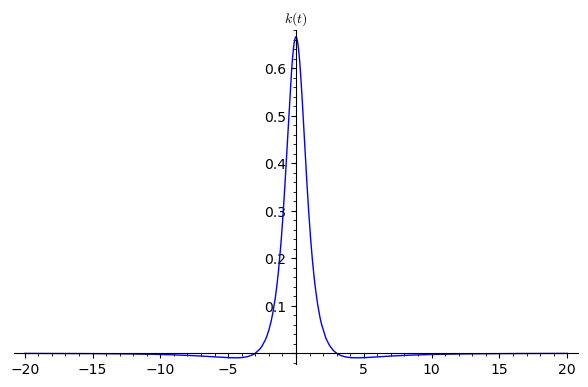

In [25]:
plot(k_t,-20,20,title='$k(t)$')

And its curvature $\kappa(-t)$ is

In [26]:
k_minust = k_t(t=-t)
show(k_minust)

-69120*(((4*t - 27)^2 + 344*t - 585)*(4*t - 9) - 4*((4*t - 27)^2 + 144*t - 585)*(t + 4))/(9*((4*t - 27)^2 + 344*t - 585)^2 + 16*((4*t - 27)^2 + 144*t - 585)^2)^(3/2)

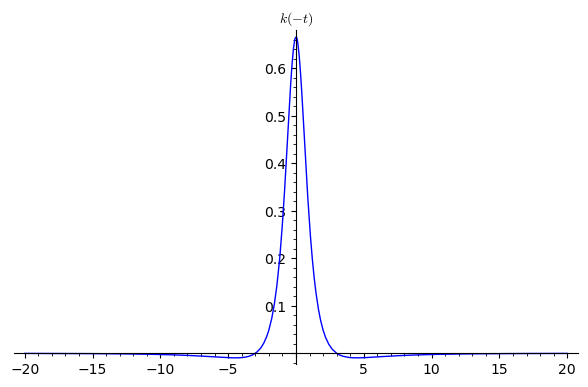

In [27]:
plot(k_minust,-20,20,title='$k(-t)$')

Apparently, it seems that $\kappa(t)=\kappa(-t)$. We check if the subtraction is exactly zero.

In [28]:
(k_t-k_minust).full_simplify()

0

Indeed, $\kappa(t)$ is an even function. As we can see in the graph of the curve in question 3, there exists a certain symmetry around the point $(2,1)$. The reparametrization allowed us to fix the centre of symmetry at $t=0$ such that the same curvature is obtained regardless of whether we vary the parameter in the positive or negative direction.

---------------------------

#### Question 8: Compute the evolute and plot it along with the curve.

The formula for the evolute is

$$\mathbf{x}+\frac{||\mathbf{x}'||^2}{\text{det}(\mathbf{x}',\mathbf{x}'')}\mathbf{x}'^{\perp}=\mathbf{x}+\frac{||\mathbf{x}'||^2}{x'y''-x''y'}(-y',x')$$

In [29]:
evolute = reparam + ((reparamprimenorm^2)/(reparamprime[0]*reparamprimeprime[1]-reparamprimeprime[0]*reparamprime[1]))*vector([-reparamprime[1],reparamprime[0]])

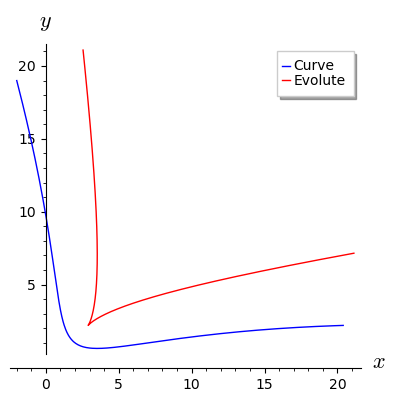

In [30]:
plotcurve = parametric_plot(reparam,(t,-6,6),color='blue',legend_label='Curve')
plotevolute = parametric_plot(evolute,(t,-2,2),color='red',legend_label='Evolute')
show(plotcurve+plotevolute,axes_labels=['$x$','$y$'])

It is known that the values of the parameter for which the curve has a vertex coincide with the values for which the evolute is not regular. Indeed, this is clearly seen at $t=0$ where the derivative of the curvature of the curve is zero while the evolute has a cusp indicating that it is not regular at $t=0$.